In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
path = '/Users/alinakozyreva/Documents/MIPT/00_Diploma/novelty_detection/data/one_dimensional'

In [5]:
df = pd.read_csv(path+'/ec2_cpu_utilization_with_anomaly.csv')

# anomalies_timestamp = [
#         "2014-02-26 22:05:00",
#         "2014-02-27 17:15:00"
# ]

# Убедитесь, что столбец метки времени является фактической меткой времени
df['timestamp'] = pd.to_datetime(df['timestamp'])

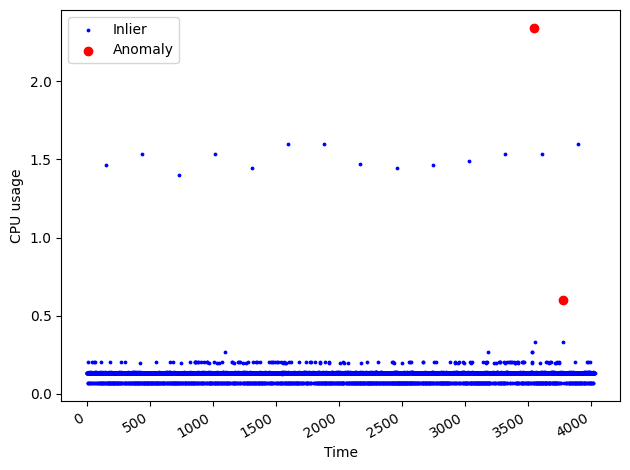

In [ ]:
# визуализируем данные
anomaly_df = df.loc[df['is_anomaly'] == -1]
inlier_df = df.loc[df['is_anomaly'] == 1]

fig, ax = plt.subplots()

ax.scatter(inlier_df.index, inlier_df['value'], color='blue', s=3, label='Inlier')
ax.scatter(anomaly_df.index, anomaly_df['value'], color='red', label='Anomaly')

ax.set_xlabel('Time')
ax.set_ylabel('CPU usage')
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

### Isolation Forest

Алгоритм изолированного леса — это древовидный алгоритм, который часто используется для обнаружения аномалий. <br/>
Алгоритм начинается со случайного выбора атрибута и случайного выбора значения разделения между максимальным и минимальным значениями для этого атрибута. Это разделение выполняется много раз, пока алгоритм не изолирует каждую точку в наборе данных. <br/>
Затем интуиция, лежащая в основе этого алгоритма, заключается в том, что для выделения выброса потребуется меньше разделов, чем для нормальной точки.

In [ ]:
train = df[:3550]
test = df[3550:]

In [ ]:
from sklearn.ensemble import IsolationForest
seed = 42 
# уровень загрязнения данных
contamination = 1/len(train)

iso_forest = IsolationForest(contamination=contamination, random_state=seed)

X_train = train['value'].values.reshape(-1,1)

iso_forest.fit(X_train)

IsolationForest(contamination=0.00028169014084507044, random_state=42)

In [ ]:
preds_iso_forest = iso_forest.predict(test['value'].values.reshape(-1,1))

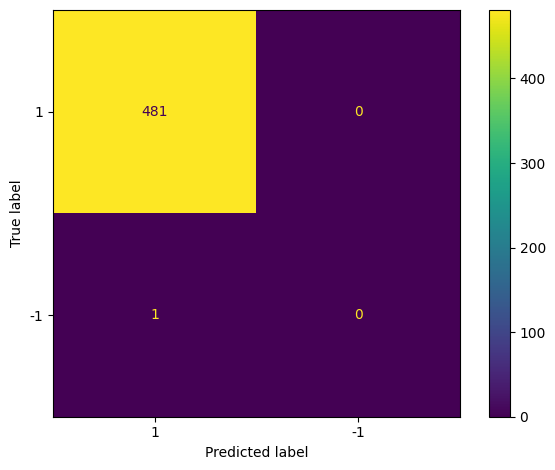

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test['is_anomaly'], preds_iso_forest, labels=[1, -1])
# is_anomaly - y_trye
# preds_iso_forest - y_predict
disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1, -1])

disp_cm.plot();

plt.grid(False)
plt.tight_layout()

Aлгоритм не смог отметить новую аномалию. Он также помечал аномалию как нормальную точку.